<a href="https://colab.research.google.com/github/ChristanSanchez/CPE-313-CPE32S3-Advanced-Machine-Learning-and-Deep-Learning/blob/main/Hands_on_Activity_2_3_Regularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Activity 1.3 : Regularization

#### Objective(s):

This activity aims to demonstrate how to apply  regularization in neural networks

#### Intended Learning Outcomes (ILOs):
* Demonstrate how to build and train neural networks with regularization
* Demonstrate how to visualize the model with regularization
* Evaluate the result of model with regularization


#### Resources:
* Jupyter Notebook
* MNIST


#### Procedures
Load the necessary libraries

In [1]:
from __future__ import print_function

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Load the data, shuffled and split between train and test sets

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Get the size of the sample train data

In [3]:
x_train[0].shape

(28, 28)

Check the sample train data

In [4]:
x_train[333]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  87, 138,
        170, 253, 201, 244, 212, 222, 138,  86,  22,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  95, 253, 252,
        252, 252, 252, 253, 252, 252, 252, 252, 245,  80,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  68, 246, 205,  69,
         69,  69,  69,  69,  69,  69,  69, 205, 253, 240,  50,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 187, 252, 218,  34,
          0,   0,   0,   0,   0,   0,   0, 116, 253, 252,  69,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 116, 248, 252, 253,  92,
          0,   0,   0,   0,   0,   0,  95, 230, 253, 157,   6,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 116, 249, 253, 189,  42,
          0,   0,   0,   0,  36, 170, 253, 243, 158,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 133, 252, 245, 140,
         34,   0,   0,  57, 219, 252, 235,  60,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  25, 205, 253, 252,
        234, 184, 184, 253, 240, 100,  44,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  21, 161, 219,
        252, 252, 252, 234,  37,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 203,
        252, 252, 252, 251, 135,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   9,  76, 255, 253,
        205, 168, 220, 255, 253, 137,   5,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 114, 252, 249, 132,
         25,   0,   0, 180, 252, 252,  45,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  51, 220, 252, 199,   0,
          0,   0,   0,  38, 186, 252, 154,   7,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 184, 252, 252,  21,   0,
          0,   0,   0,   0,  67, 252, 252,  22,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 184, 252, 200,   0,   0,
          0,   0,   0,   0,  47, 252, 252,  22,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 185, 253, 201,   0,   0,
          0,   0,   0,   3, 118, 253, 245,  21,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 163, 252, 252,   0,   0,
          0,   0,   0,  97, 252, 252,  87,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  51, 240, 252, 123,  70,
         70, 112, 184, 222, 252, 170,  13,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 165, 252, 253, 252,
        252, 252, 252, 245, 139,  13,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

Check the corresponding label in the training set

In [5]:

y_train[333]

np.uint8(8)

Check the image

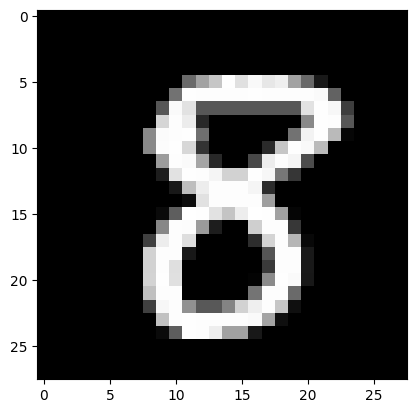

In [8]:

plt.imshow(x_train[333], cmap='Greys_r')

Check the shape of the x_train and x_test

In [9]:

print(x_train.shape, 'train samples')
print(x_test.shape, 'test samples')

(60000, 28, 28) train samples
(10000, 28, 28) test samples


* Convert the x_train and x_test
* Cast the numbers to floats
* Normalize the inputs

In [10]:

x_train = x_train.reshape(len(x_train), 28*28)
x_test = x_test.reshape(len(x_test), 28*28)


x_train = x_train.astype('float32')
x_test = x_test.astype('float32')


x_train /= 255
x_test /= 255


Convert class vectors to binary class matrices

In [11]:

num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

y_train[333]  # now the digit k is represented by a 1 in the kth entry (0-indexed) of the length 10 vector

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.])

* Build the model with two hidden layers of size 512.
* Use dropout of 0.2
* Check the model summary

In [12]:

model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(784,))) #INPUT LAYER AND 1ST HIDDEN LAYER
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax')) #OUTPUT LAYER

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 55,050 (215.04 KB)

 Trainable params: 55,050 (215.04 KB)

 Non-trainable params: 0 (0.00 B)

Compile the model using learning rate of 0.001 and optimizer of RMSprop

In [16]:
learning_rate = .001
model.compile(loss='categorical_crossentropy', # sigmoid / binary_croseentrophy
              optimizer=RMSprop(learning_rate),
              metrics=['accuracy'])
batch_size = 128  # mini-batch with 128 examples
epochs = 30
history = model.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(x_test, y_test))

Epoch 1/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.7467 - loss: 0.8299 - val_accuracy: 0.9369 - val_loss: 0.2102
Epoch 2/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9201 - loss: 0.2721 - val_accuracy: 0.9540 - val_loss: 0.1522
Epoch 3/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9391 - loss: 0.2075 - val_accuracy: 0.9599 - val_loss: 0.1315
Epoch 4/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9473 - loss: 0.1785 - val_accuracy: 0.9671 - val_loss: 0.1119
Epoch 5/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9515 - loss: 0.1646 - val_accuracy: 0.9701 - val_loss: 0.1068
Epoch 6/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9576 - loss: 0.1457 - val_accuracy: 0.9673 - val_loss: 0.1056
Epoch 7/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9615 - loss: 0.1357 - val_accuracy: 0.9698 - val_loss: 0.1011
Epoch 8/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9634 - loss: 0.1257 - val_accuracy: 0.

Use Keras evaluate function to evaluate performance on the test set

In [17]:

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.10222481191158295
Test accuracy: 0.9753000140190125


Interpret the result

From what I can interpret is that the result ended with a 97 percent accuracy which is good, and the test lost is only minimal which is 1 percent. This means that the model is ood and also was able to generalize well, and having a high chance to perform well with real data.

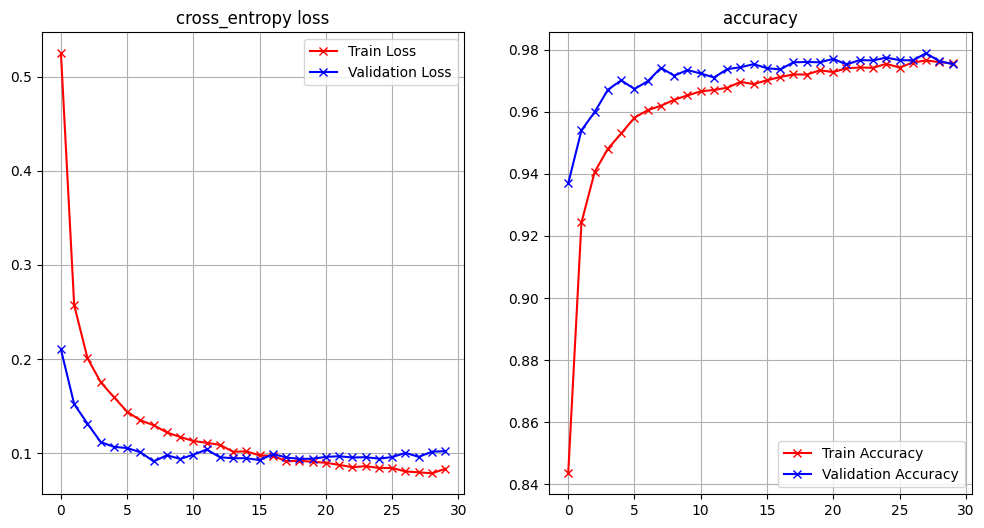

In [18]:
def plot_loss_accuracy(history):
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(history.history["loss"],'r-x', label="Train Loss")
    ax.plot(history.history["val_loss"],'b-x', label="Validation Loss")
    ax.legend()
    ax.set_title('cross_entropy loss')
    ax.grid(True)


    ax = fig.add_subplot(1, 2, 2)
    ax.plot(history.history["accuracy"],'r-x', label="Train Accuracy")
    ax.plot(history.history["val_accuracy"],'b-x', label="Validation Accuracy")
    ax.legend()
    ax.set_title('accuracy')
    ax.grid(True)


plot_loss_accuracy(history)

Interpret the result

Seesing as the cross-entropy loss measures the performance of a classification model, in this case having a low score means that it can determine well. And it's accuracy shows that the it is a good model.

#### Supplementary Activity

* Use the Keras "Sequential" functionality to build a new model (model_1) with the following specifications:

1. Two hidden layers.
2. First hidden layer of size 400 and second of size 300
3. Dropout of .4 at each layer
4. How many parameters does your model have?  How does it compare with the previous model?
5. Train this model for 20 epochs with RMSProp at a learning rate of .001 and a batch size of 128
6. Use at least two  regularization techniques and apply it to the new model (model_2)
7. Train this model for your preferred epochs , learning rate, batch size and optimizer
8. Compare the accuracy and loss (training and validation) of model_1 and model_2

In [43]:
model_1 = Sequential()
model_1.add(Dense(400, activation='relu', input_shape=(784,))) #INPUT LAYER AND 1ST HIDDEN LAYER
model_1.add(Dropout(0.4))
model_1.add(Dense(300, activation='relu'))
model_1.add(Dropout(0.4))
model_1.add(Dense(10, activation='softmax')) #OUTPUT LAYER

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [44]:
model_1.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_27 (Dense)                │ (None, 400)            │       314,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 300)            │       120,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 300)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 10)             │         3,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 437,310 (1.67 MB)

 Trainable params: 437,310 (1.67 MB)

 Non-trainable params: 0 (0.00 B)


How many parameters does your model have? How does it compare with the previous model?

It has a total parameter of 437,310, and comparing it to the previous model is that the model size has only 55,050, because of it dense size.

In [45]:
lr = .001
model_1.compile(loss='categorical_crossentropy', # sigmoid / binary_croseentrophy
              optimizer=RMSprop(lr),
              metrics=['accuracy'])
batch_size = 128  # mini-batch with 128 examples
epochs = 20
history_1 = model_1.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(x_test, y_test))

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - accuracy: 0.8293 - loss: 0.5489 - val_accuracy: 0.9616 - val_loss: 0.1295
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.9503 - loss: 0.1614 - val_accuracy: 0.9689 - val_loss: 0.0991
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.9627 - loss: 0.1265 - val_accuracy: 0.9726 - val_loss: 0.0949
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - accuracy: 0.9689 - loss: 0.1027 - val_accuracy: 0.9765 - val_loss: 0.0773
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - accuracy: 0.9747 - loss: 0.0848 - val_accuracy: 0.9779 - val_loss: 0.0768
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - accuracy: 0.9768 - loss: 0.0808 - val_accuracy: 0.9788 - val_loss: 0.0778
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 13s 27ms/step - accuracy: 0.9784 - loss: 0.0702 - val_accuracy: 0.9835 - val_loss: 0.0614
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - accuracy: 0.9794 - loss: 0.0682 - val_

In [46]:
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras import regularizers

model_2 = Sequential()
model_2.add(Dense(400, activation='relu', input_shape=(784,))) #INPUT LAYER AND 1ST HIDDEN LAYER
model_2.add(BatchNormalization())
model_2.add(Dense(300, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model_2.add(Dense(10, activation='softmax')) #OUTPUT LAYER

In [47]:
model_2.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_30 (Dense)                │ (None, 400)            │       314,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 400)            │         1,600 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 300)            │       120,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 10)             │         3,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 438,910 (1.67 MB)

 Trainable params: 438,110 (1.67 MB)

 Non-trainable params: 800 (3.12 KB)

In [48]:
lr = .001
model_2.compile(loss='categorical_crossentropy', # sigmoid / binary_croseentrophy
              optimizer=RMSprop(lr),
              metrics=['accuracy'])
batch_size = 128  # mini-batch with 128 examples
epochs = 20
history_2 = model_2.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(x_test, y_test))

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - accuracy: 0.9133 - loss: 1.4445 - val_accuracy: 0.9645 - val_loss: 0.1812
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.9700 - loss: 0.1591 - val_accuracy: 0.9678 - val_loss: 0.1544
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.9775 - loss: 0.1236 - val_accuracy: 0.9751 - val_loss: 0.1291
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.9819 - loss: 0.1037 - val_accuracy: 0.9728 - val_loss: 0.1321
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - accuracy: 0.9837 - loss: 0.0939 - val_accuracy: 0.9755 - val_loss: 0.1294
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.9858 - loss: 0.0833 - val_accuracy: 0.9773 - val_loss: 0.1197
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.9881 - loss: 0.0734 - val_accuracy: 0.9766 - val_loss: 0.1164
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - accuracy: 0.9874 - loss: 0.0728 - val_ac

In [54]:
score = model_1.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.07065232843160629
Test accuracy: 0.9847000241279602


In [55]:

score = model_2.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.10947918891906738
Test accuracy: 0.9793999791145325


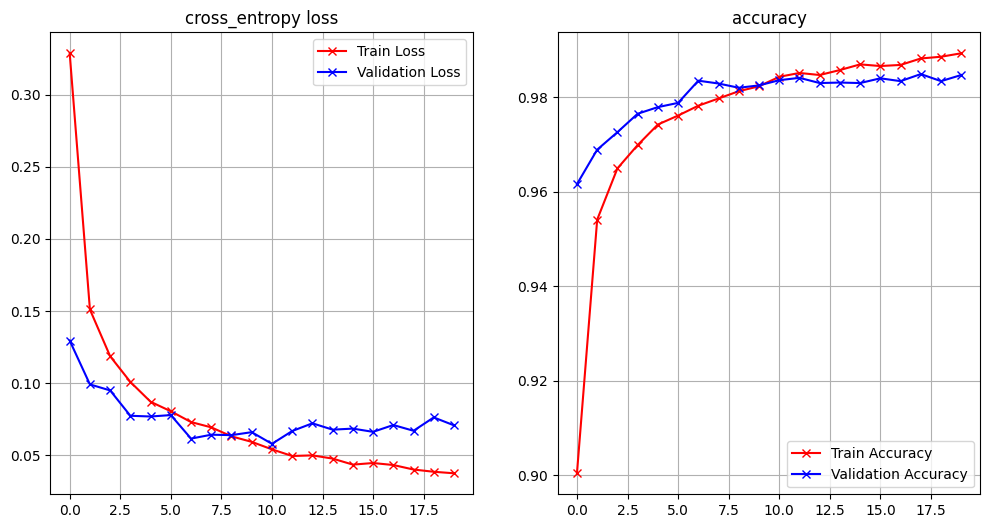

In [50]:
def plot_loss_accuracy(history_1):
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(history_1.history["loss"],'r-x', label="Train Loss")
    ax.plot(history_1.history["val_loss"],'b-x', label="Validation Loss")
    ax.legend()
    ax.set_title('cross_entropy loss')
    ax.grid(True)


    ax = fig.add_subplot(1, 2, 2)
    ax.plot(history_1.history["accuracy"],'r-x', label="Train Accuracy")
    ax.plot(history_1.history["val_accuracy"],'b-x', label="Validation Accuracy")
    ax.legend()
    ax.set_title('accuracy')
    ax.grid(True)


plot_loss_accuracy(history_1)

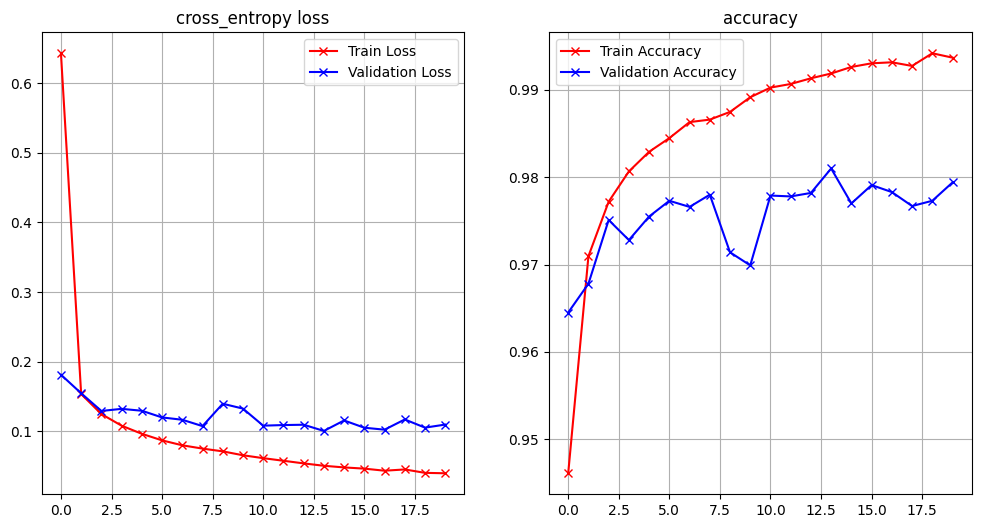

In [51]:
def plot_loss_accuracy(history_2):
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(history_2.history["loss"],'r-x', label="Train Loss")
    ax.plot(history_2.history["val_loss"],'b-x', label="Validation Loss")
    ax.legend()
    ax.set_title('cross_entropy loss')
    ax.grid(True)


    ax = fig.add_subplot(1, 2, 2)
    ax.plot(history_2.history["accuracy"],'r-x', label="Train Accuracy")
    ax.plot(history_2.history["val_accuracy"],'b-x', label="Validation Accuracy")
    ax.legend()
    ax.set_title('accuracy')
    ax.grid(True)


plot_loss_accuracy(history_2)

Analysis:

Model 1 outperformed Model 2 because dropout provided stronger generalization for MNIST, while Model 2’s batch normalization combined with relatively strong L2 regularization constrained learning and slightly reduced accuracy.

#Supplementary #2


#### Conclusion

In this activity, I learned how to use regularization techniques such as dropout, Batchnormalization, regulizers, etc. and further expanded my knowledge in making models, by optimizing the values of the model compilation, I kinda get the idea on how to optimize or to make them generalize better. I also discovered my mistake on using regularization techniques that aren't fit to my model which strains them rather than generalizing them better.

In [56]:
from keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train.reshape(len(x_train), 32*32*3)
x_test = x_test.reshape(len(x_test), 32*32*3)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')


x_train /= 255
x_test /= 255

num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


In [62]:
x_train[0].shape

(3072,)

In [81]:
orig_model = Sequential()
orig_model.add(Dense(1000, activation='relu', input_shape=(3072,))) #INPUT LAYER AND 1ST HIDDEN LAYER
orig_model.add(Dropout(0.6))
orig_model.add(Dense(400, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
orig_model.add(Dropout(0.6))
orig_model.add(Dense(10, activation='softmax')) #OUTPUT LAYER

In [82]:
orig_model.summary()

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_45 (Dense)                │ (None, 1000)           │     3,073,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 1000)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_46 (Dense)                │ (None, 400)            │       400,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_47 (Dense)                │ (None, 10)             │         4,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,477,410 (13.27 MB)

 Trainable params: 3,477,410 (13.27 MB)

 Non-trainable params: 0 (0.00 B)

In [83]:
lr = .001
orig_model.compile(loss='categorical_crossentropy', # sigmoid / binary_croseentrophy
              optimizer=RMSprop(lr),
              metrics=['accuracy'])
batch_size = 128  # mini-batch with 128 examples
epochs = 30
history_orig = orig_model.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(x_test, y_test))

Epoch 1/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 42s 100ms/step - accuracy: 0.1582 - loss: 4.1151 - val_accuracy: 0.2983 - val_loss: 1.9926
Epoch 2/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 38s 97ms/step - accuracy: 0.2494 - loss: 2.0573 - val_accuracy: 0.3251 - val_loss: 1.9088
Epoch 3/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 38s 97ms/step - accuracy: 0.2669 - loss: 2.0004 - val_accuracy: 0.3326 - val_loss: 1.8974
Epoch 4/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 41s 96ms/step - accuracy: 0.2792 - loss: 1.9747 - val_accuracy: 0.3493 - val_loss: 1.8937
Epoch 5/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 39s 101ms/step - accuracy: 0.2879 - loss: 1.9604 - val_accuracy: 0.3457 - val_loss: 1.8844
Epoch 6/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 40s 103ms/step - accuracy: 0.2881 - loss: 1.9526 - val_accuracy: 0.3613 - val_loss: 1.8519
Epoch 7/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 39s 100ms/step - accuracy: 0.2942 - loss: 1.9440 - val_accuracy: 0.3103 - val_loss: 1.8935
Epoch 8/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 37s 95ms/step - accuracy: 0.2929 - loss: 1.939

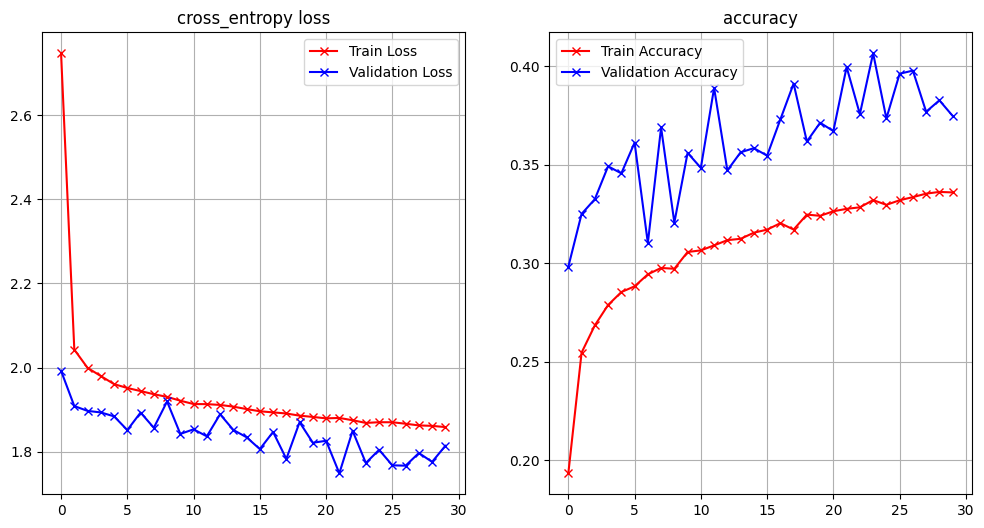

In [84]:
plot_loss_accuracy(history_orig)

In [85]:
score = orig_model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.8145146369934082
Test accuracy: 0.3749000132083893


In [98]:
orig_model2 = Sequential()
orig_model2.add(Dense(1000, activation='relu', input_shape=(3072,))) #INPUT LAYER AND 1ST HIDDEN LAYER
orig_model2.add(Dropout(0.4))
orig_model2.add(Dense(700, activation='relu'))
orig_model2.add(Dropout(0.4))
orig_model2.add(Dense(500, activation='relu'))
orig_model2.add(Dropout(0.4))
orig_model2.add(Dense(10, activation='softmax')) #OUTPUT LAYER

In [99]:
orig_model2.summary()

Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_57 (Dense)                │ (None, 1000)           │     3,073,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_26 (Dropout)            │ (None, 1000)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_58 (Dense)                │ (None, 700)            │       700,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_27 (Dropout)            │ (None, 700)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_59 (Dense)                │ (None, 500)            │       350,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_28 (Dropout)            │ (None, 500)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_60 (Dense)                │ (None, 10)             │         5,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,129,210 (15.75 MB)

 Trainable params: 4,129,210 (15.75 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
lr = .001
orig_model2.compile(loss='categorical_crossentropy', # sigmoid / binary_croseentrophy
              optimizer=RMSprop(lr),
              metrics=['accuracy'])
batch_size = 128  # mini-batch with 128 examples
epochs = 30
history_orig = orig_model2.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(x_test, y_test))

Epoch 1/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 48s 118ms/step - accuracy: 0.1741 - loss: 2.5012 - val_accuracy: 0.3053 - val_loss: 1.9303
Epoch 2/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 44s 112ms/step - accuracy: 0.2774 - loss: 1.9717 - val_accuracy: 0.2718 - val_loss: 1.9972
Epoch 3/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 44s 112ms/step - accuracy: 0.3012 - loss: 1.9152 - val_accuracy: 0.3635 - val_loss: 1.8137
Epoch 4/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 46s 116ms/step - accuracy: 0.3204 - loss: 1.8754 - val_accuracy: 0.3583 - val_loss: 1.8074
Epoch 5/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 48s 121ms/step - accuracy: 0.3338 - loss: 1.8449 - val_accuracy: 0.3768 - val_loss: 1.8029
Epoch 6/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 44s 111ms/step - accuracy: 0.3355 - loss: 1.8323 - val_accuracy: 0.3742 - val_loss: 1.8080
Epoch 7/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 44s 113ms/step - accuracy: 0.3371 - loss: 1.8250 - val_accuracy: 0.4095 - val_loss: 1.7769
Epoch 8/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 43s 109ms/step - accuracy: 0.3584 - loss: 1

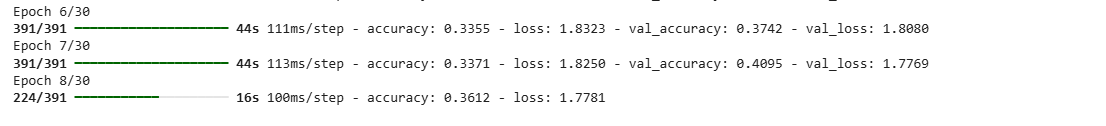